## PERCEPTRON

* A perceptron is a single layer neural network
* It acts as a linear classifier, Binary Classification
* Loss Function-> Binary Cross Entropy
* It is -ve Log Likelihood
* Optimisation-> Gradient Descent/ Stochastic Gradient Desccent


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs


## Generating Data

In [4]:
X,Y=make_blobs(n_samples=500,n_features=2,centers=2,random_state=11)

In [5]:
print(X.shape,Y.shape)

(500, 2) (500,)


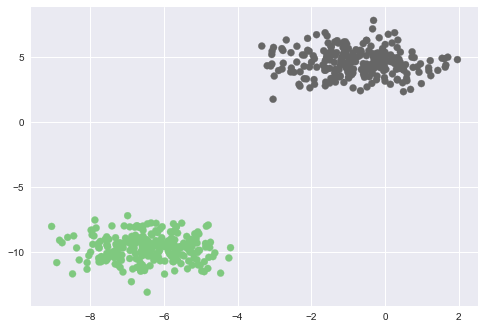

In [9]:
plt.style.use("seaborn")
plt.scatter(X[:,0],X[:,1],c=Y,cmap=plt.cm.Accent)
plt.show()

## Model and helper functions

In [10]:
def sigmoid(z):
    return (1.0)/(1+np.exp(-z))

In [12]:
#z=np.array([1,2,3,4,5])   #Broadcasting
#sigmoid(z)

array([0.73105858, 0.88079708, 0.95257413, 0.98201379, 0.99330715])

## Implement Perceptron Learning Algorithm
* Learn the weights
* Reduce the loss
* Make predictions

In [22]:
def predict(X,weights):
    # X-> mX(n+1) matrix    W->(nX1,)vector
    z=np.dot(X,weights)
    predictions=sigmoid(z)
    return predictions
    
def loss(X,Y,weights):
    #Binary Cross Entropy
    Y_=predict(X,weights)
    cost=np.mean(-Y*np.log(Y_) -(1-Y)*np.log(1-Y_))
    return cost

def update(X,Y,weights,learning_rate):
    #Perform updates for one epoch
    Y_=predict(X,weights)
    dw=np.dot(X.T,Y_-Y)
    
    m=X.shape[0]
    weights=weights-learning_rate*dw/(float(m))
    return weights
       
def train(X,Y,learning_rate=0.5,maxEpochs=100):
    #Modify the input matrix to handle the bias term
    ones=np.ones((X.shape[0],1))
    X=np.hstack((ones,X))
    
    #Init Weights 0
    
    weights=np.zeros(X.shape[1]) #n+1 entries
    
    #Iterate over all epochs and make updates
    for epoch in range(maxEpochs):
        
        weights=update(X,Y,weights,learning_rate)
        
        if epoch%10==0:
            l=loss(X,Y,weights)
            print("Epoch %d Loss %.4f"%(epoch,l))
            
    return weights
            
            
        
    
    


In [ ]:
weights=train(X,Y,learning_rate=0.8,maxEpochs=1000)